In [2]:
import pandas as pd
import joblib
kospi = pd.read_excel('hoga_KOSPI.xlsx')
kosdaq = pd.read_excel('hoga_KOSDAQ.xlsx')

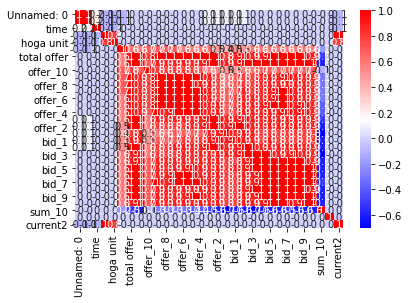

In [ ]:
import seaborn as sns
correlation_matrix = kospi.corr().round(1)
sns.heatmap(data=correlation_matrix, annot=True, cmap="bwr")

In [48]:
k = []
for i, y in enumerate(kospi['current']):
  if y == 0.0:
    k.append(i)
kospi_r = kospi.drop(k)
kospi_r = kospi_r.dropna()
x_kospi = kospi_r.drop(['Unnamed: 0', 'code', 'time', 'current', 'current2'], axis=1)
y_kospi = kospi_r['current2']
print(x_kospi.shape)


(712, 27)


In [49]:
k = []
for i, y in enumerate(kosdaq['current']):
  if y == 0.0:
    k.append(i)
kosdaq_r = kosdaq.drop(k)
kosdaq_r = kosdaq_r.dropna()
x_kosdaq = kosdaq_r.drop(['Unnamed: 0', 'code', 'time', 'current', 'current2'], axis=1)
y_kosdaq = kosdaq_r['current2']
print(x_kosdaq.shape)

(711, 27)


In [50]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# ss = StandardScaler()
# x_kospi = ss.fit_transform(x_kospi)

x_train, x_test, y_train, y_test = train_test_split(x_kospi, y_kospi, test_size= 0.2, random_state=13)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(569, 27)
(143, 27)
(569,)
(143,)


In [51]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [52]:
from sklearn.metrics import mean_squared_error
import numpy as np

y_train_predict = reg.predict(x_train)
rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict)))

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is ', rmse)

The model performance for training set
--------------------------------------
RMSE is  317.84178010926155


In [53]:
y_test_predict = reg.predict(x_test)
rmse = (np.sqrt(mean_squared_error(y_test, y_test_predict)))

print("The model performance for test set")
print("--------------------------------------")
print('RMSE is ', rmse)

The model performance for test set
--------------------------------------
RMSE is  1414.5313909149475


['./hoga_KOSPI_LR.pkl']

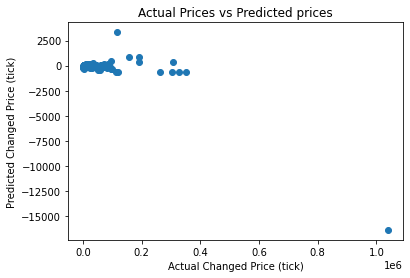

In [54]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_test_predict-y_test)
plt.xlabel("Actual Changed Price (tick)")
plt.ylabel("Predicted Changed Price (tick)")
plt.title("Actual Prices vs Predicted prices")
joblib.dump(reg, './hoga_KOSPI_LR.pkl')

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# ss = StandardScaler()
# x_kosdaq = ss.fit_transform(x_kosdaq)

x_train, x_test, y_train, y_test = train_test_split(x_kosdaq, y_kosdaq, test_size= 0.2, random_state=13)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(568, 27)
(143, 27)
(568,)
(143,)


In [56]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(x_train, y_train)
from sklearn.metrics import mean_squared_error
import numpy as np

y_train_predict = reg.predict(x_train)
rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict)))

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is ', rmse)

The model performance for training set
--------------------------------------
RMSE is  301.55335163444164


In [57]:
y_test_predict = reg.predict(x_test)
rmse = (np.sqrt(mean_squared_error(y_test, y_test_predict)))

print("The model performance for test set")
print("--------------------------------------")
print('RMSE is ', rmse)

The model performance for test set
--------------------------------------
RMSE is  637.8500393755736


['./hoga_KOSDAQ_LR.pkl']

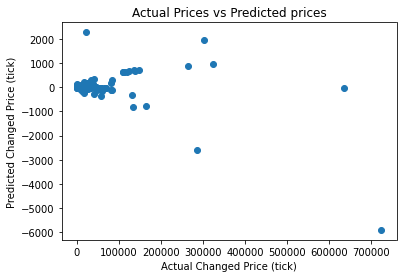

In [58]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_test_predict-y_test)
plt.xlabel("Actual Changed Price (tick)")
plt.ylabel("Predicted Changed Price (tick)")
plt.title("Actual Prices vs Predicted prices")
joblib.dump(reg, './hoga_KOSDAQ_LR.pkl')